# Neural Network Hidden activations clustering and visualization
I will try to record the hidden layer activations from the trained neural network on CIFAR-10 and try to cluster them and visualize them

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [2]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Training the neural network from the neural network questions, and using the best hyper parameters

In [3]:
input_size = 32 * 32 * 3
hidden_size = 57
num_classes = 10
l_r = 0.00041667558973261217
train_itrs = 27485 
reg = 0.02580555826518483 
l_r_decay = 0.9723054695482463

net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=train_itrs, batch_size=200,
            learning_rate=l_r, learning_rate_decay=l_r_decay,
            reg=reg, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 27485: loss 2.302623
iteration 100 / 27485: loss 2.104096
iteration 200 / 27485: loss 2.031874
iteration 300 / 27485: loss 1.784286
iteration 400 / 27485: loss 1.661233
iteration 500 / 27485: loss 1.712968
iteration 600 / 27485: loss 1.637312
iteration 700 / 27485: loss 1.613484
iteration 800 / 27485: loss 1.690016
iteration 900 / 27485: loss 1.600947
iteration 1000 / 27485: loss 1.578134
iteration 1100 / 27485: loss 1.708943
iteration 1200 / 27485: loss 1.579875
iteration 1300 / 27485: loss 1.488322
iteration 1400 / 27485: loss 1.491624
iteration 1500 / 27485: loss 1.454194
iteration 1600 / 27485: loss 1.514237
iteration 1700 / 27485: loss 1.389700
iteration 1800 / 27485: loss 1.487761
iteration 1900 / 27485: loss 1.391643
iteration 2000 / 27485: loss 1.392352
iteration 2100 / 27485: loss 1.475529
iteration 2200 / 27485: loss 1.334259
iteration 2300 / 27485: loss 1.417839
iteration 2400 / 27485: loss 1.578505
iteration 2500 / 27485: loss 1.348562
iteration 2600 / 27485: 

iteration 21300 / 27485: loss 1.046523
iteration 21400 / 27485: loss 0.967190
iteration 21500 / 27485: loss 0.913311
iteration 21600 / 27485: loss 1.086179
iteration 21700 / 27485: loss 0.979329
iteration 21800 / 27485: loss 1.052935
iteration 21900 / 27485: loss 1.050036
iteration 22000 / 27485: loss 0.992782
iteration 22100 / 27485: loss 1.054171
iteration 22200 / 27485: loss 1.174556
iteration 22300 / 27485: loss 0.975536
iteration 22400 / 27485: loss 0.944528
iteration 22500 / 27485: loss 1.046812
iteration 22600 / 27485: loss 1.004263
iteration 22700 / 27485: loss 1.049558
iteration 22800 / 27485: loss 1.020891
iteration 22900 / 27485: loss 1.163847
iteration 23000 / 27485: loss 0.965748
iteration 23100 / 27485: loss 1.027666
iteration 23200 / 27485: loss 1.068565
iteration 23300 / 27485: loss 1.089168
iteration 23400 / 27485: loss 1.062031
iteration 23500 / 27485: loss 0.942870
iteration 23600 / 27485: loss 1.114954
iteration 23700 / 27485: loss 0.969084
iteration 23800 / 27485: 

# Hidden activations
Here I am calculating the hidden activations

In [5]:
W1, b1 = net.params['W1'], net.params['b1']
val_hidden_activations = net.relu(net.linear_layer(X_val, W1, b1))

# Calculating the visualization feature space
Here I am using t-sne as intermediate features for visualization

In [14]:
import numpy as np
from sklearn.manifold import TSNE
transformer = TSNE(n_components=2, verbose=2)
val_hidden_activations_embedded = transformer.fit_transform(val_hidden_activations)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 23.800700
[t-SNE] Computed conditional probabilities in 0.079s
[t-SNE] Iteration 50: error = 76.2332611, gradient norm = 0.3167253 (50 iterations in 0.458s)
[t-SNE] Iteration 100: error = 76.7077637, gradient norm = 0.3114377 (50 iterations in 0.604s)
[t-SNE] Iteration 150: error = 78.8447571, gradient norm = 0.3040879 (50 iterations in 0.521s)
[t-SNE] Iteration 200: error = 78.3062592, gradient norm = 0.3127584 (50 iterations in 0.467s)
[t-SNE] Iteration 250: error = 77.4135437, gradient norm = 0.2992001 (50 iterations in 0.476s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.413544
[t-SNE] Iteration 300: error = 1.8832846, gradient norm = 0.0027646 (50 iterations in 0.388s)
[t-SNE] Iteration 350: error = 1.8010871, gradient norm = 0.0006

# Visualizing the activations after t-sne

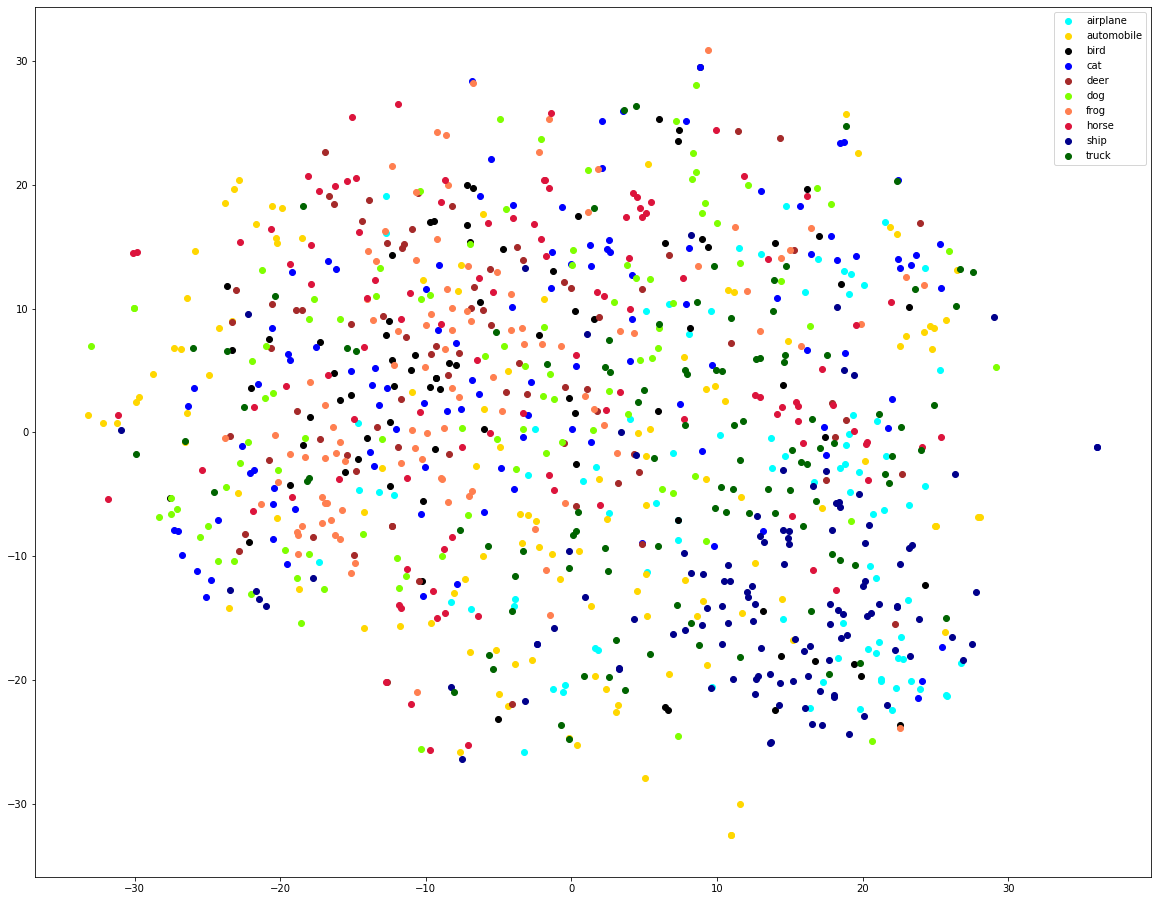

In [23]:
category_vs_colors_vs_label=[('airplane', 'aqua', 0),
                             ('automobile', 'gold', 1),
                             ('bird', 'black', 2),
                             ('cat', 'blue', 3),
                             ('deer', 'brown', 4),
                             ('dog', 'chartreuse', 5),
                             ('frog', 'coral', 6),
                             ('horse', 'crimson', 7),
                             ('ship', 'darkblue', 8),
                             ('truck', 'darkgreen', 9)]

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
for category, color, label in category_vs_colors_vs_label:
    category_embeddings = val_hidden_activations_embedded[y_val == label]
    x = category_embeddings[:, 0]
    y = category_embeddings[:, 1]
    #print(color)
    plt.scatter(x,y, c=color, label=category)
plt.legend()
plt.get_current_fig_manager()
plt.show()